---
title: "Big Brother Brasil - Uma análise exploratória com Python"
format: 
    html:
        code-fold: false
execute:
    enable: true
jupyter: python3
---

## Big Brother Brasil - Uma análise exploratória com Python

- Introdução
- Dados
    - Origem
    - Conhecendo os dados
- Desenvolvimento
    - Idade
    - Região
    - Ocupação
    - Gênero
    - Campeões
- Interativo
- Conclusão
- Referências

In [1]:
import pandas as pd
import seaborn as sns
from unidecode import unidecode
from zodiac_sign import get_zodiac_sign
from datetime import date, datetime
from numpy import isnan
import matplotlib.pyplot as plt
import geopandas as gpd

data_raw = pd.read_csv("data/dados.csv", sep = ";")

### Introdução

<div style = "text-align: justify"> &emsp;Big Brother Brasil (BBB) é atualmente o maior reality show transmitido em TV aberta brasileira. Com origem em 1998, nos EUA, o programa é baseado no conceito do "Grande Irmão", do livro 1984 (George Orwell, 1949), que vigia ininteruptamente os moradores de seu pais. A premissa principal do programa é o isolamento de seus participantes durante 3 meses na "casa mais vigiada do Brasil" com pessoas desconhecidas (e famosos atualmente). 
<br>&emsp;Semanalmente, os participantes passam por desafios que podem trazer recompensas, como a provas do lider ou do anjo, que concedem imunidade e estalecas (moeda ficticia do programa) aos vencedores, e punição aos menos queridos, com o castigo do monstro. Parte de sua popularidade esta no fato da diversidade dos candidatos, trazendo um elenco de pessoas de diversas etnias, idades e gêneros. 
<br>&emsp;A ideia desse relatório é explorar quais são as caracteristicas mais comuns nos candidatos escolhidos, principalmente em relação a idade, profissão e origem, criando um perfil do que seria o "candidato ideal" para a vitória da competição. Se passou pela sua cabeça ser um "brother" ou "sister", essa análise pode te ajudar a decidir se está na hora de se inscrever no programa e, quem sabe, se tonar milhonário (ou pelo menos receber o célebre título de ex-bbb). </div>

## Dados

### Origem

&emsp;Os dados utilizados nesta análise foram compilados através de web scraping das páginas da Wikipédia referentes às  22 edições do programa. O código utilizado pode ser encontrado [aqui](www.google.com.br)

### Conhecendo os dados

In [2]:
data_raw.shape

(366, 9)

In [3]:
data_raw.dtypes

nome                   object
genero                 object
data_nascimento        object
idade_participacao    float64
ocupacao               object
municipio              object
estado                 object
edicao                  int64
classificacao         float64
dtype: object

&emsp;A nossa base é composta por 362 linhas e 8 colunas. As linhas representam todos os participantes das ediçoes de 1 a 22 e as colunas representam algumas informações referentes a esses participantes:
<br>&emsp;- nome (str): nome completo do participante</br>
&emsp;- genero (str): genero do participante (para facilitar a analise, assumiu-se o gênero de acordo com o primeiro nome do participante)
<br>&emsp;- data_nasciment (date): data de nascimento</br>
&emsp;- idade_participacao (date): idade do participante no inicio do reality show
<br>&emsp;- ocupacao (str): profissões (em alguns casos, existe mais de uma profissão)</br>
&emsp;- municipio (str): municipio de nascimento 
<br>&emsp;- estado (str): estado de nascimento</br>
&emsp;- classificacao (int): colocação final no programa (1 = 1º lugar, 2 = 2º lugar, etc)
<br>&emsp;- edicao (int): nº da edição

In [35]:
data_raw.head(5)

,nome,genero,data_nascimento,idade_participacao,ocupacao,municipio,estado,edicao,classificacao
0,Kleber de Paula Pedra (Bambam),male,1978-02-14,24.0,Dançarino,Campinas,São Paulo,1,1.0
1,Vanessa Melanie Pascale Ekypenyong Walborn,female,1974-11-28,28.0,Modelo,Rio de Janeiro,Rio de Janeiro,1,2.0
2,André Batista de Carvalho,male,1974-11-28,28.0,Professor de canto,Rio de Janeiro,Rio de Janeiro,1,3.0
3,Antonio Sergio Tavares Campo,male,1972-12-06,30.0,Cabeleireiro,Angola,Exterior,1,4.0
4,Alessandra Begliomini,female,1974-12-05,28.0,Empresária,São Paulo,São Paulo,1,5.0


## Exploração

### Idade

Vamos iniciar nossa análise verificando qual a distribuição de idade dos selecionados para o programa

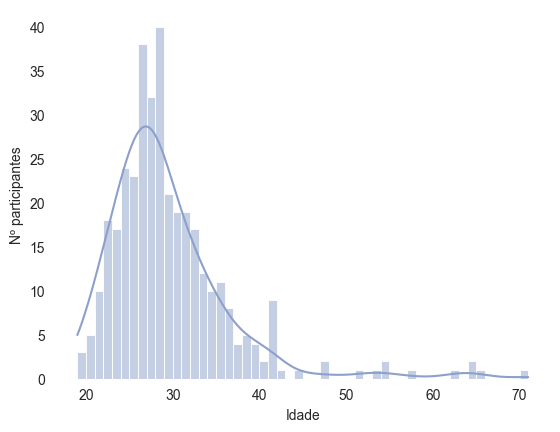

In [4]:
sns.set_style("white")
p = sns.histplot(data_raw, x = "idade_participacao", binwidth= 1, kde = True, color = sns.color_palette("Set2")[2])
p.set(xlabel = "Idade", ylabel = "Nº participantes")
sns.despine(left = True, bottom = True)

Nota-se que a há uma preferência em candidatos de 20 a 40 anos. Podemos verificar como essa distribuição varia quando considera-se também o gênero dos participantes.

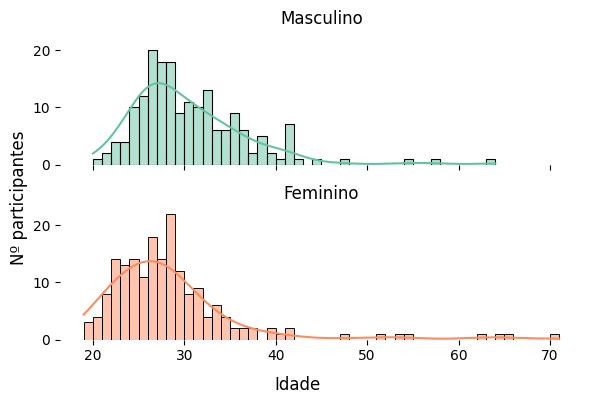

In [68]:

p = sns.FacetGrid(data_raw, row = 'genero', height= 2, aspect=3, hue = "genero", palette=sns.color_palette("Set2"))
p.map(sns.histplot, "idade_participacao", binwidth = 1, kde = True)
p.set_axis_labels("", "")
p.fig.supxlabel("Idade")
p.fig.supylabel("Nº participantes")
axes = p.axes.flatten()
axes[0].set_title("Masculino")
axes[1].set_title("Feminino")
p.despine(bottom = True, left = True)

A partir da visualização acima, é perceptível que participantes do gênero feminino tendem a entrar com uma idade inferior aos homens, além de terem menos participantes com idades próximas ou acima de 40 anos. 

E em relação as temporadas, será que a idade dos participantes costuma variar?

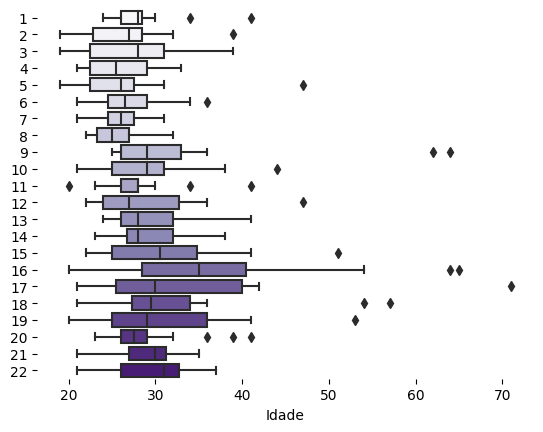

In [70]:
data_raw['edicao'] = data_raw['edicao'].astype("str")
plot = sns.boxplot(data = data_raw, y = "edicao", x = "idade_participacao", palette = "Purples")
plot.set(xlabel = "Idade", ylabel = "")
sns.despine(left = True, bottom = True)

Algumas edições, como a 1 ou a 11, apresentaram baixíssima variação de idade, tendo 75% dos participantes com até 30 anos. Já a edição 16 foi a que apresentou maior variação de idade.

Ainda com base na idade, podemos verificar, por curiosidade, como se distribui os signos dos participantes.

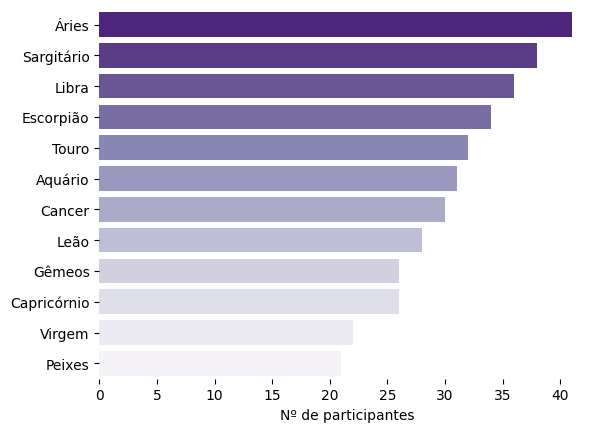

In [69]:
# date_str = "1998/05/29"
# date = datetime.strptime(date_str, "%d/%m/%Y")
# get_zodiac_sign(date)

def pegar_signo(data):
    try:
        data_formatada = datetime.strptime(data, "%Y-%m-%d")
        signo = get_zodiac_sign(data_formatada)
        return signo
    except:
        return None


data_raw['signo'] = data_raw.apply(lambda row: pegar_signo(row['data_nascimento']), axis = 1)
# data_raw.apply(lambda row: neutralizar_genero(row['ocupacao']), axis = 1)
plot = sns.countplot(y = data_raw['signo'], order = data_raw['signo'].value_counts().index, palette = "Purples_r")
plot.set(xlabel = "Nº de participantes", ylabel = "")
sns.despine(left = True, bottom = True)


Curiosamente, o signo de áries teve o dobro de participantes do signo de Peixes.

## Origem

In [2]:
import requests as re
ibge = re.get("https://servicodados.ibge.gov.br/api/v3/malhas/paises/BR?formato=application/vnd.geo+json&qualidade=maxima&intrarregiao=UF")
geodata = gpd.read_file(ibge.text)

In [3]:
siglas = {
"12": ["AC", "Acre"],
"27": ["AL", "Alagoas"],
"13": ["AM", "Amazonas"],
"16": ["AP", "Amapá"],
"29": ["BA", "Bahia"],
"23": ["CE", "Ceará"],
"53": ["DF", "Distrito Federal"],
"32": ["ES", "Espírito Santo"],
"52": ["GO", "Goiás"],
"21": ["MA", "Maranhão"],
"31": ["MG", "Minas Gerais"],
"50": ["MS", "Mato Grosso do Sul"],
"51": ["MT", "Mato Grosso"],
"15": ["PA", "Pará"],
"25": ["PB", "Paraíba"],
"26": ["PE", "Pernambuco"],
"22": ["PI", "Piauí"],
"41": ["PR", "Paraná"],
"33": ["RJ", "Rio de Janeiro"],
"24": ["RN", "Rio Grande do Norte"],
"11": ["RO", "Rondônia"],
"14": ["RR", "Roraima"],
"43": ["RS", "Rio Grande do Sul"],
"42": ["SC", "Santa Catarina"],
"28": ["SE", "Sergipe"],
"35": ["SP", "São Paulo"],
"17": ["TO", "Tocantins"]
}


In [4]:
geodata['estado'] = geodata['codarea'].map(siglas)
geodata[["sigla", "estado"]] = pd.DataFrame(geodata['estado'].tolist(), index = geodata.index).reset_index(drop = True)
geodata['estado'] = geodata['estado'].str.strip()

In [23]:
estado_count = pd.DataFrame(data_raw['estado'].value_counts().reset_index()).rename(columns = {"index": "estado", "estado": "cont"})
estado_count['estado'] = estado_count['estado'].str.strip()
mapa_count = geodata.merge(estado_count, how = "left", on = 'estado').fillna(0)

<AxesSubplot: >

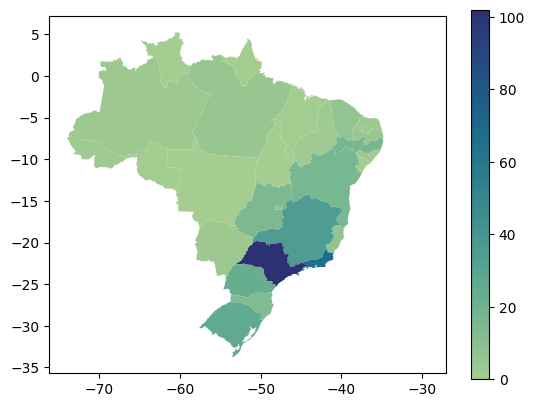

In [34]:
mapa_count.dissolve("codarea").reset_index().plot(column = "cont", cmap = "crest", legend = True)

In [22]:
data_raw['estado'].unique()

array([' São Paulo', ' Rio de Janeiro', 'Exterior', ' Bahia', ' Paraná',
       ' Pernambuco', ' Rio Grande do Sul', ' Goiás', ' Santa Catarina',
       ' Mato Grosso do Sul', ' Distrito Federal', ' Paraíba',
       ' Buenos Aires', ' Minas Gerais', ' Ceará', ' Pará', ' Piauí',
       ' Amazonas', ' Espírito Santo', ' Roraima', ' Rio Grande do Norte',
       ' Alagoas', ' Acre', ' Alepo', ' Rondônia', ' Maranhão'],
      dtype=object)

## Ocupação

Após o fim do programa, é normal os participantes adquirirem uma nova profissão: "Ex-BBB", mas antes disso é necessário que eles sejam escolhidos com base nas suas profissões atuais. Além de "modelo", quais outras profissões são importantes para ser escolhido para a casa mais vigiada do Brasil?

In [ ]:
data_raw['ocupacao'].str.lower().str.replace(" e ", ",").str.split(",").explode().value_counts()

modelo                   40
jornalista               10
empresário               10
cantora                  10
ator                      9
                         ..
estudante de turismo      1
produtora                 1
estudante de farmácia     1
coreógrafo                1
bailarino                 1
Name: ocupacao, Length: 213, dtype: int64

Pode-se remover gênero, acentuação e simplificar as profissões para termos uma ideia melhor de como as profissões são distribuidas

In [ ]:
profissoes = data_raw['ocupacao'].str.lower().str.replace(" e ", ",").str.replace(",", "/").str.split("/")
profissoes = [j for i in profissoes for j in i]
for i, profissao in enumerate(profissoes):
    palavra = profissao.split()[0]
    if palavra == "atriz":
        palavra = "ator"
    if palavra[-1] in ['a', 'o']:
        palavra = palavra[0:-1]
    profissoes[i] = palavra
pd.Series(profissoes).value_counts().head(10)

estudante        45
model            41
ator             18
empresári        17
cantor           16
professor        15
advogad          11
jornalist        10
promotor          9
influenciador     8
dtype: int64

In [35]:
def neutralizar_genero(row):
    profissoes = row.replace("/", ", ").replace(" e ", ", ").split(", ")
    profissoes_resumidas = []
    for i, j in enumerate(profissoes):
        profissao = unidecode(j.split(" ")[0]).lower()
        if (profissao[-1] in ["a", "o"]):
            profissao = profissao[:-1]
        elif profissao == "atriz":
            profissao = "ator"
        profissoes_resumidas.append(profissao)
    return profissoes_resumidas


data_raw['ocupacao_resumida'] = data_raw.apply(lambda row: neutralizar_genero(row['ocupacao']), axis = 1)

[Text(0, 0, '45'),
 Text(0, 0, '41'),
 Text(0, 0, '18'),
 Text(0, 0, '17'),
 Text(0, 0, '16'),
 Text(0, 0, '15'),
 Text(0, 0, '11'),
 Text(0, 0, '10'),
 Text(0, 0, '9'),
 Text(0, 0, '8')]

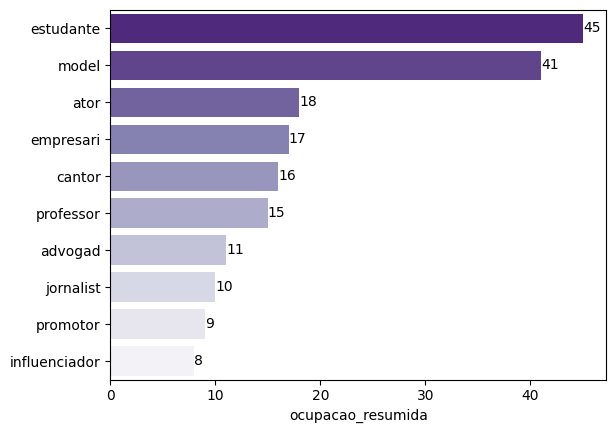

In [ ]:
p = sns.barplot(y = data_raw['ocupacao_resumida'].explode().value_counts().index,
            x = data_raw['ocupacao_resumida'].explode().value_counts(),
            order = data_raw['ocupacao_resumida'].explode().value_counts().iloc[:10].index,
            palette = "Purples_r")
p.bar_label(p.containers[0])

In [53]:
data_raw.corr()

C:\Users\Carlos\AppData\Local\Temp\ipykernel_15644\793374919.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_raw.corr()


,idade_participacao,edicao,classificacao
idade_participacao,1.000000,0.191164,0.048936
edicao,0.191164,1.000000,0.062528
classificacao,0.048936,0.062528,1.000000


In [67]:
from scipy.stats import chi2_contingency

crosstab = pd.crosstab(index = data_raw['genero'], columns=data_raw['classificacao'])
crosstab

classificacao,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,99
genero,,,,,,,,,,,,,,,,,,,,,
female,11,16,9,2,13,11,9,9,15,12,...,12,6,8,6,4,2,3,0,0,8
male,11,6,8,8,7,11,14,13,7,11,...,8,8,4,5,5,4,2,1,1,13


H0: as variaveis não são correlacionadas entre si

In [69]:
chisqresults = chi2_contingency(crosstab)
chisqresults

Chi2ContingencyResult(statistic=36.985217907980065, pvalue=0.023744343204973112, dof=22, expected_freq=array([[11. , 11. ,  8.5,  5. , 10. , 11. , 11.5, 11. , 11. , 11.5, 11. ,
        10.5, 10. , 10. ,  7. ,  6. ,  5.5,  4.5,  3. ,  2.5,  0.5,  0.5,
        10.5],
       [11. , 11. ,  8.5,  5. , 10. , 11. , 11.5, 11. , 11. , 11.5, 11. ,
        10.5, 10. , 10. ,  7. ,  6. ,  5.5,  4.5,  3. ,  2.5,  0.5,  0.5,
        10.5]]))